In [1]:
import nltk

nltk는 영어 자연어처리 오픈소스 툴이다.  
gutenberg는 말뭉치(소설)이다.  
punkt는 토큰화할때 필요하다.  

In [2]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/keunmo/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/keunmo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

자연어를 분석하기 위해 문자열을 토큰화할 수 있다.  
sent_tokenize는 문장 단위로, word_tokenize는 단어 단위로 토큰화한다.  

In [5]:
from nltk.tokenize import sent_tokenize
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [6]:
words=['lives', 'crying', 'dying']

In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/keunmo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

WordNetLemmatizer를 이용해 형태소 분석을 할 수 있다.  
단어로부터 어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고 이를 이용해 형태소를 찾아내거나 처리한다.  
어간 추출: stemming  
원형 복원: lemmatizing  
품사 태깅: pos_tag (part of speech)
    

In [8]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
[lm.lemmatize(w) for w in words]

['life', 'cry', 'dying']

lemmatize 사용시 pos='품사' 지정해주면 그 형태로 바뀐다. 

In [9]:
[lm.lemmatize(w, pos='v') for w in words]

['live', 'cry', 'die']

In [10]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/keunmo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

nltk의 품사 태깅에서는 [Penn Treebank Tagset](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)을 이용한다.

In [11]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
sentence = sent_tokenize(emma_raw[0:10000])[3]
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Sixteen', 'JJ'),
 ('years', 'NNS'),
 ('had', 'VBD'),
 ('Miss', 'NNP'),
 ('Taylor', 'NNP'),
 ('been', 'VBN'),
 ('in', 'IN'),
 ('Mr.', 'NNP'),
 ('Woodhouse', 'NNP'),
 ("'s", 'POS'),
 ('family', 'NN'),
 (',', ','),
 ('less', 'CC'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('governess', 'NN'),
 ('than', 'IN'),
 ('a', 'DT'),
 ('friend', 'NN'),
 (',', ','),
 ('very', 'RB'),
 ('fond', 'NN'),
 ('of', 'IN'),
 ('both', 'DT'),
 ('daughters', 'NNS'),
 (',', ','),
 ('but', 'CC'),
 ('particularly', 'RB'),
 ('of', 'IN'),
 ('Emma', 'NNP'),
 ('.', '.')]

결과를 파일로 저장하는법.  
outfile = open("경로/경로/파일.txt", "w")  
outfile.write(str(tagged_list))  
outfile.close()  

In [34]:
def filesave(path, obj):
    outfile = open(path, 'w')
    outfile.write(str(obj))
    outfile.close()

In [12]:
mobydick = nltk.corpus.gutenberg.raw("melville-moby_dick.txt")

In [36]:
# sentence = sent_tokenize(mobydick[0:10000])[3]
sentence = sent_tokenize(mobydick)[3]
# print(sentence)
word_list = word_tokenize(sentence)
tagged_list = pos_tag(word_list)
noun_word = [word for word, pos in tagged_list if pos in ['NN', 'NNP', 'NNS']]
filesave('./files/moby_word_list.txt', word_list)
filesave('./files/moby_tagged_list.txt', tagged_list)
filesave('./files/moby_noun_word.txt', noun_word)

In [41]:
words = word_tokenize(mobydick[0:10000])
words
# outfile = open("./moby_words_token.txt", "w")
# outfile.write(str(words))
# outfile.close

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(',
 'Supplied',
 'by',
 'a',
 'Late',
 'Consumptive',
 'Usher',
 'to',
 'a',
 'Grammar',
 'School',
 ')',
 'The',
 'pale',
 'Usher',
 '--',
 'threadbare',
 'in',
 'coat',
 ',',
 'heart',
 ',',
 'body',
 ',',
 'and',
 'brain',
 ';',
 'I',
 'see',
 'him',
 'now',
 '.',
 'He',
 'was',
 'ever',
 'dusting',
 'his',
 'old',
 'lexicons',
 'and',
 'grammars',
 ',',
 'with',
 'a',
 'queer',
 'handkerchief',
 ',',
 'mockingly',
 'embellished',
 'with',
 'all',
 'the',
 'gay',
 'flags',
 'of',
 'all',
 'the',
 'known',
 'nations',
 'of',
 'the',
 'world',
 '.',
 'He',
 'loved',
 'to',
 'dust',
 'his',
 'old',
 'grammars',
 ';',
 'it',
 'somehow',
 'mildly',
 'reminded',
 'him',
 'of',
 'his',
 'mortality',
 '.',
 '``',
 'While',
 'you',
 'take',
 'in',
 'hand',
 'to',
 'school',
 'others',
 ',',
 'and',
 'to',
 'teach',
 'them',
 'by',
 'what',
 'name',
 'a',
 'whale-fish',
 'is',
 'to',
 'be',
 'called',

In [33]:
tagged_words = pos_tag(word_tokenize(str(words)))
tagged_words

[('[', 'NN'),
 ("'", "''"),
 ('[', 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'Moby", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'Dick", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'by", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'Herman", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'Melville", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'1851", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'", "''"),
 (']', 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'ETYMOLOGY", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'", "''"),
 ('.', '.'),
 ("'", "''"),
 (',', ','),
 ("'", "''"),
 ('(', '('),
 ("'", "''"),
 (',', ','),
 ("'Supplied", 'VBD'),
 ("'", "''"),
 (',', ','),
 ("'by", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'", "''"),
 ('a', 'DT'),
 ("'", "''"),
 (',', ','),
 ("'Late", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'Consumptive", 'CD'),
 ("'", "''"),
 (',', ','),
 ("'Usher", 'PRP'),
 ("'", "''"),
 (',', ','),
 ("'to", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'", "''"),
 ('a', 'DT'),
 ("'", "''"),
 (',', ','),
 ("'Grammar", 'NNP'),
 ("'", '

텍스트에서 빈도순 상위 10개 단어를 보여준다. 

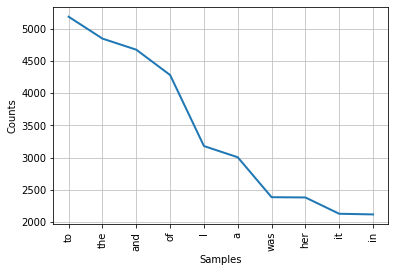

In [53]:
from nltk import Text
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
retokenize = RegexpTokenizer("[\w]+")
text = Text(retokenize.tokenize(emma_raw),name="Emma")
text.plot(10)
plt.show()

In [55]:
from collections import Counter

retokenize = RegexpTokenizer("[\w]+")
text = Text(retokenize.tokenize(emma_raw),name="Emma")
cnt = Counter(text)
print(cnt.most_common(5))

[('to', 5183), ('the', 4844), ('and', 4672), ('of', 4279), ('I', 3178)]


텍스트에서 출현 횟수가 높은 단어 5개와 그 횟수를 출력한다. 